# 训练和可视化决策树 Training and Visualizing a Decision Tree

以鸢尾花数据集为例，建立决策树，看看它是如何做出预测的。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

- `Scikit-Learn`的`DecisionTreeClassifier()`函数实现决策树分类

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
# 1. 加载数据集
iris = load_iris()
X = iris.data[:,(2,3)]  # 花瓣的长度和宽度
y = iris.target

In [4]:
# 2. 拟合模型
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

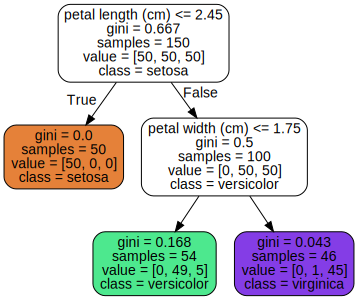

In [5]:
# 决策树可视化
from sklearn.tree import export_graphviz
from graphviz import Source

IMAGES_PATH = os.path.join(".", "images", "decision_trees")

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# 做出决策 Making Predictions

观察鸢尾花决策树，可以知道: 
1. 假设你找到一朵鸢尾花要对其进行分类，你可以从根节点开始:该结构询问花的花瓣长度是否小于2.45cm.
2. 如果是,则向下移动到根的左子节点。在这种情况下,它是一片叶子节点，因此他不会提出任何问题:只需要查看该结点的预测类,然后决策树就可以预测花朵是山鸢尾花(`class=setosa`).


3. 现在假设你发现了另一朵花,这次花的长度大于2.45cm,你必须向下移动到根的右子节点,该子节点不是叶子节点,因此该节点会问另一个问题: 是否小于1.75cm?
4. 如果是,则你的花朵很可能是变色鸢尾花(`class=versicolor`).
5. 如果不是,则可能是维吉尼亚鸢尾花(`class=virginica`).

- `samp1es`属性统计它应用的训练实例数量。例如,有100个训练实例的花瓣长度大于2.45cm.
- `va1ue`属性说明了该节点上每个类别的训练实例数量。例如,右下节点应用在0个山鸢尾、1个变色鸢尾和45个维吉尼亚鸢尾实例上。
- `gini`属性衡量其不纯度(impurity):如果应用的所有训练实例都属于同一个类别,那么节点就是“纯”的 (gini=0)。

>公式1:基尼指数 Gini index
- 基尼指数:
假设现在有 $K$ 个类, 样本点属于第 $k$ 个类的概率为 $p_{k}$, 则概率分布的 基尼指数为:
$$
{Gini}(p)=\sum_{k=1}^{K} p_{k}\left(1-p_{k}\right)=1-\sum_{k=1}^{K} p_{k}^{2}
$$
- 二分类:
$$
{Gini}(p)=2 p(1-p)
$$
- 样本集 $D$ 的基尼指数:
$$
{Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}
$$

- 特征空间划分

In [6]:
from matplotlib.colors import ListedColormap  # 用户自定义颜色库

def plot_decision_boundary(model, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100) 
    x1, x2 = np.meshgrid(x1s, x2s)          # 生成网格点坐标矩阵   (100, 100)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]   # (10000, 2)
    y_pred = model.predict(X_new).reshape(x1.shape)  # (100, 100)
    
    custome_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    # 绘制等高线图
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custome_cmap)
    
    # 数据
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="山鸢尾花")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="变色鸢尾花")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="维吉尼亚鸢尾花")
    plt.axis(axes)

In [7]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./Fonts/SourceHanSerifSC-Medium.otf', size=12)

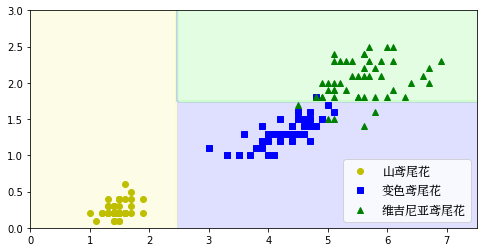

In [8]:
ax = [0, 7.5, 0, 3]
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y, ax)
plt.legend(loc="lower right", prop=my_font)

plt.show()

特征空间划分如下图所示:

<img src="./images/other/6-1.png" width="600">

决策树的一个特征是**不需要进行特征缩放或居中**.

# 估计类概率 Estimating Class Probabilities

决策树同样也可以估计某个实例属于特定类$k$的概率，首先跟随决策树找到该实例的叶节点，然后返回该节点中类$k$的训练实例占比。

以一朵花瓣长5cm,宽1.5cm的鸢尾花为例:

<img src="./images/other/6-2.png" width="350">

决策树输出概率为`山鸢尾花`0%(0/54);`变色鸢尾花`90.7%(49/54);`维吉尼亚鸢尾花`9.3%(5/54).

- 输出预测

In [9]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

输出预测结果为`变色鸢尾花`

# CART训练算法 The CART Training Algorithm

`Scikit-Learn`使用的是`CART算法`来训练决策树.

----
**分类树算法：**

输入: 训练数据集 $D$ 、特征集 $A$ 、阈值 $\epsilon$

输出：CART决策树 $T$

① 从根节点出发,进行操作,构建二叉树;

② 结点处的训练数据集为$D$,计算现有特征对该数据集的基尼指数,并选择最优特征。

1. 在特征$A_{g}$下,对其可能取的每个值$a_{g}$,根据样本点对$A_{g}$=$a_{g}$的测试为“是”或“否”,将$D$分割成$D_1$和$D_2$两部分,计算$A_{g}$=$a_{g}$时的`基尼指数`。
2. 选择基尼指数最小的那个值作为该特征下的`最优切分点`。
3. 计算每个特征下的最优切分点,并比较在最优切分下的每个特征的基尼指数,选择基尼指数最小的那个特征,即`最优特征`。

③ 根据最优特征与最优切分点,从现结点生成两个子结点,将训练数据集依特征分配到两个子结点中去。

④ 分别对两个子结点递归地调用上述步骤,直至满足停止条件(比如结点中的样本个数小于预定阂值,或样本集的基尼指数小于预定值(样本基本属于同一类),或者没有更多特征),即生成CART决策树。

----

`CART算法`是一种贪心算法:从顶层开始搜索最优分裂，然后每一层重复这个过程。底层分裂之后，它并不会检视这个分裂的不纯度是否为可能的最低值。贪婪算法是通常会产生一个相当不错的解，但不能保证是最优解。

而不幸的是寻找最优树是一个已知的`NP完全问题`:需要的时间是$O(e^{(m)})$，所以即使是很小的训练接也相当棘手。

# 计算复杂度 Computational Complexity

- 决策树通常是近似平衡的，因此遍历决策树需要经过$O(log_2(m))$个结点。由于每个结点仅需要检查一个特征值，因此整体时间复杂度为$O(log_2(m))$.与特征无关，预测速度比较快.
- 训练算法比较每个节点上所有样本的所有特征(如果设置了`max_features`, 则更少)。比较每个节点上所有样本的所有特征，会导致训练复杂度为$O(n·m·log_2(m))$。

- 对于小训练集(小于几千个实例)，`Sklearn`可以通过对数据进行预排序(设置`presort=True`)来加快训练速度，不然这样会大大降低大训练集的训练速度。

# 基尼不纯度或熵 Gini Impurity or Entropy?

默认使用的是`基尼不纯度`来进行预测，但是你可以将超参数`criterion="entropy"`来选择熵作为不纯度的测量方式。

----
**信息增益：**

输入: 训练数据集 $D$ 和特征 $A$

输出：特征 $A$ 对 $D$ 的信息增益 $g(D, A)$
- 计算经验熵 $H(D)$ :
$$
H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|} \mid
$$
- 计算经验条件熵 $H(D \mid A)$ :
$$
H(D \mid A)=\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} H\left(D_{i}\right)=-\sum_{i=1}^{n}\frac{\left|D_{i}\right|}{|D|} \sum_{k=1}^{K} \frac{\left|D_{i k}\right|}{|D|} \log _{2} \frac{\left|D_{i k}\right|}{|D|}
$$
- 计算信息增益:
$$
g(D, A)=H(D)-H(D \mid A)
$$

----

基尼不纯度比熵的计算速度略快一些，它们的不同在于`基尼不纯度`倾向于从树枝中分类出最常见的类别，而`熵`则倾向于更平衡的树。

# 正则化超参数 Regularization Hyperparameters

决策树极少对训练数据作出假设。如果不加以限制，树的结构就会跟随着训练集变化，严密贴合，并且很有可能过拟合。这种模型，通常被称为`非参数模型`。这里不是说它不包含任何参数，而是指在训练之前没有确定参数的数量，导致模型结构自由而紧密的贴合数据。相反，`参数模型`(比如线性模型)则有预先设定好的一部分参数，因此自由度受限，从而降低了过拟合的风险(但增加了欠拟合的风险).

为了避免过拟合，需要在训练过程做降低决策树的自由度，通常正则化超参数可以是决策树的最大深度。在`sklearn`中，由超参数`max_depth`控制，默认为`None`,表示无限制。减少参数值可使模型正则化，从而降低过拟合风险。

`DecisionTreeClassifier`还有其他的一些参数，同样可以限制决策树的形状。
- `min_samples_split`:分裂前节点必须有的最小样本数
- `min_samples_leaf` 叶子节点必须有的最小样本数量 
- `min_weight_fraction_leaf`: 与`min_samples_leaf`一样，表现为加权实例总数的占比。
- `max_leaf_nodes`:最大叶节点数量
- `max_features`: 分类每个节点评估的最大特征数量。 
- 增大 `min_*` 或减少 `max_*` 将会使得模型正则化。

也可以先不加约束的训练模型，然后在对不必要的节点进行`剪枝`，如果一个节点的子节点全部为叶节点，该节点可被认为不必要，除非它所表示的纯度提升有重要的统计意义。

以卫星数据集为例训练两个决策树:分别使用默认超参数和限制叶子节点必须有的最小样本数量.

In [11]:
from sklearn.datasets import make_moons

In [12]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.25, random_state=53)

tree_clf_moons_1 = DecisionTreeClassifier(random_state=42)
tree_clf_moons_2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)

tree_clf_moons_1.fit(X_moons, y_moons)
tree_clf_moons_2.fit(X_moons, y_moons)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

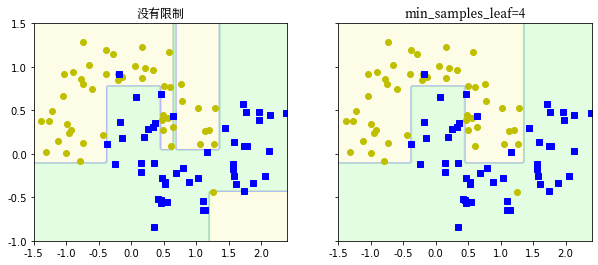

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

ax = [-1.5, 2.4, -1, 1.5]
plt.sca(axes[0])
plot_decision_boundary(tree_clf_moons_1, X_moons, y_moons, ax)
plt.title("没有限制", font_properties=my_font)

plt.sca(axes[1])
plot_decision_boundary(tree_clf_moons_2, X_moons, y_moons, ax)
plt.title("min_samples_leaf={}".format(tree_clf_moons_2.min_samples_leaf), font_properties=my_font)

plt.show()

由上图可知，左侧模型过拟合，右侧的模型可能更好的泛化。

# 回归 Regression

---

**回归树算法：**

输入: 训练数据集 $D$, 停止条件

输出: CART决策树 $T$

① 从根节点出发, 进行操作, 构建二叉树;

② 结点处的训练数据集为 $D$, 计算变量的最优切分点, 并选择最优变量。
$$
\min _{j, s}\left[\min _{c_{1}} \sum_{x_{i} \in R_{1}(j, s)}\left(y_{i}-c_{1}\right)^{2}+\min _{c_{2}} \sum_{x_{i} \in R_{2}(j, s)}\left(y_{i}-c_{2}\right)^{2}\right]
$$
1. 在第 $j$ 变量下, 对其可能取的每个值 $s$, 根据样本点分割成 $R_{1}$ 和 $R_{2}$ 两部分, 计算切分点为 $s$ 时的平方误差。 
2. 选择平方误差最小的那个值作为该变量下的最优切分点。 
3. 计算每个变量下的最优切分点, 并比较在最优切分下的每个变量的平方误差, 选择平方误差最小的那个变量, 即 最优变量。
③ 根据最优特征与最优切分点 $(j, s)$, 从现结点生成两个子结点，将训练数据集依变量配到两个子结点中去, 得到相应的输出值。
$$
\begin{array}{l}
R_{1}(j, s)=\left\{x \mid x^{(j)} \leqslant s\right\}, \quad R_{2}(j, s)=\left\{x \mid x^{(j)}>s\right\} \\
\hat{c}_{m}=\frac{1}{N_{m}} \sum_{x_{i} \in R_{m}(j, s)} y_{i}, \quad x \in R_{m}, \quad m=1,2
\end{array}
$$

④ 继续对两个子区域调用上述步骤，直至满足停止条件，即生成CART 决策树。
$$
f(x)=\sum_{m=1}^{M} \hat{c}_{m} l\left(x \in R_{m}\right)
$$



In [14]:
# 生成有噪声的二次数据集
np.random.seed(42)
X = np.array(np.random.rand(100, 1))              # rand()是0-1的均匀随机分布
y = np.array(4 * (X-0.5)**2 + np.random.randn(100, 1)/10)  # randn()是均值为0方差为1的标准正态分布 -> 生成高斯噪音

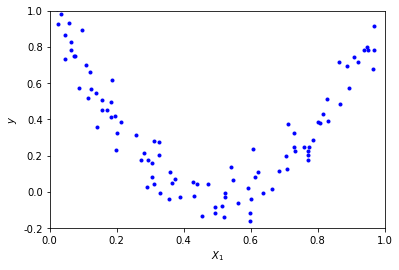

In [15]:
plt.plot(X, y, 'b.')

plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.axis([0, 1, -0.2 ,1])

plt.show()

- 利用`Scikit-Learn`的`DecisionTreeRegressor()`构建回归树

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

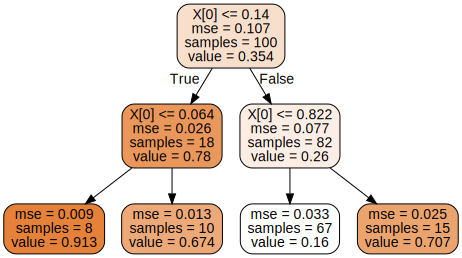

In [18]:
# 决策树可视化
from sklearn.tree import export_graphviz
from graphviz import Source

IMAGES_PATH = os.path.join(".", "images", "decision_trees")

export_graphviz(
    tree_reg,
    out_file=os.path.join(IMAGES_PATH, "Regressor.dot"),
    rounded=True,
    filled=True,
)

Source.from_file(os.path.join(IMAGES_PATH, "Regressor.dot"))

<img src="./images/other/6-3.png" width="600">

每个区域的预测值永远等于该区域内实例的目标平均值。算法分裂每个区域的方法，就是使得最多训练实例尽可能接近这个预测值。

正则化一个回归决策树:

In [19]:
tree_reg_1 = DecisionTreeRegressor(random_state=42)  # 无限制
tree_reg_2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

tree_reg_1.fit(X, y)
tree_reg_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [20]:
X_new = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred_1 = tree_reg_1.predict(X_new)
y_pred_2 = tree_reg_2.predict(X_new)

In [21]:
def plot_Regressor(X, y, X_new, y_pred):
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_pred, "r.-")
    plt.axis([0, 1, -0.2, 1.1])
    
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)

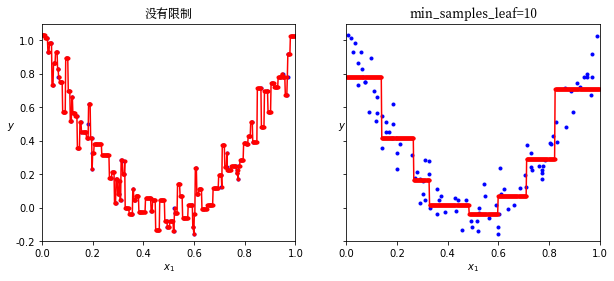

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_Regressor(X, y, X_new, y_pred_1)
plt.title("没有限制", fontproperties=my_font)

plt.sca(axes[1])
plot_Regressor(X, y, X_new, y_pred_2)
plt.title("min_samples_leaf={}".format(tree_reg_2.min_samples_leaf), fontproperties=my_font)

plt.show()

设置` min_samples_leaf=10`会得到一个更合理的模型

# 不稳定性 Instability

决策树喜欢正交的决策边界，这使得他们对训练集旋转敏感。如下图所示，在左侧决策树可以很轻松地将其拆分，而在右侧将数据集旋转45度之后，决策边界看起来复杂了，尽管两个角色数都非常拟合数据集，但右侧的模型可能无法很好地泛化。限制此问题的一种方法是使用`主成分分析法`,这通常会使得训练数据方向更好。

<img src="./images/other/6-4.png" width="500">

决策树的主要问题是他们对训练数据中小变化非常敏感。下图所示的是移除最宽的变色鸢尾花后所训练的决策树，与前面所示的完全不同。`随机森林`可以通过对许多树进行平均预测来限制这种不稳定性。

<img src="./images/other/6-5.png" width="500">

# 练习题 Exercise

## ex.1

Q:如果训练集有100万个实例,训练决策树(无约束)大致的深度是多少?

>**The depth of a well-balanced binary tree(均衡二叉树) containing $m$ leaves is equal to $log_2(m)$**, 2 rounded up. A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, **if the training set contains one million instances, the Decision Tree will have a depth of $log_2(10^6) ≈ 20$** (actually a bit more since the tree will generally not be perfectly well balanced).

## ex.2

Q:通常来说,子节点的基尼不纯度是高于还是低于其父节点?是通常更高/更低?是永远更高/更低?

>**A node’s Gini impurity is generally lower than its parent’s.** This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, **as long as this increase is more than compensated(补偿) for by a decrease in the other child’s impurity.** 

## ex.3

Q:如果决策树过拟合训练集,减少`max_depth`是否为一个好主意?

>If a Decision Tree is overfitting the training set, it may be **a good idea** to decrease max_depth, since this will constrain the model, regularizing it.

## ex.4

Q:如果决策树对训练集欠拟合,尝试缩放输入特征是否为一个好主意?

>**Decision Trees don’t care whether or not the training data is scaled or centered**; that’s one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

## ex.5

Q:如果在包含 100 万个实例的训练集上训练决策树需要一个小时,那么在包含1000万个实例的训练集上训练决策树,大概需要多长时间?

>The computational complexity of training a Decision Tree is $O(n × m log(m))$. So if you multiply the training set size by 10, the training time will be multiplied by $K = (n × 10m × log(10m)) / (n × m × log(m))$$ = 10 × log(10m) / log(m)$. If $m = 10^6$ , then K ≈ 11.7, so you can expect the training time to be **roughly 11.7 hours**.

## ex.6

Q:如果训练集包含 10 万个实例,设置 `presort=True` 可以加快训练吗?

>Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances. If it contains 100,000 instances, setting `presort=True` **will considerably slow down training**.

## ex.7

Q: 为卫星数据集训练并微调一个决策树。
>1. 使用 `make_moons(n_samples=10000, noise=0.4)`生成一个卫星数据集。
2. 使用 `train_test_split()`拆分训练集和测试集。
3. 使用交叉验证的网格搜索(在 `GridSearchCV` 的帮助下)为 `DecisionTreeClassifier` 找到适合的超参数。提示:尝试 `max_leaf_nodes`(最大叶节点数量) 的多种值。
4. 使用超参数对整个训练集进行训练,并测量模型在测试集上的性能。你应该得到约 85%~87% 的准确率。

1. 使用 `make_moons(n_samples=10000, noise=0.4)`生成一个卫星数据集。

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

2. 使用 `train_test_split()`拆分训练集和测试集。

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. 使用交叉验证的网格搜索(在 `GridSearchCV` 的帮助下)为 `DecisionTreeClassifier` 找到适合的超参数。提示:尝试 `max_leaf_nodes`(最大叶节点数量) 的多种值。

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_leaf_nodes":list(range(2, 100)),  # 最大叶节点数量
    "min_samples_leaf":[2, 3, 4]           # 叶子节点必须有的最小样本数量
}

grid_search = GridSearchCV(estimator=tree_reg, 
                           param_grid=params,
                           cv=3, 
                           verbose=2,  # verbose：日志冗长度
                           n_jobs=-1
                          )
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    2.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 

In [27]:
grid_search.best_params_

{'max_leaf_nodes': 17, 'min_samples_leaf': 2}

4. 使用超参数对整个训练集进行训练,并测量模型在测试集上的性能。你应该得到约 85%~87% 的准确率。

In [28]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8695

## ex.8

Q:按照以下步骤种植森林。
>1. 继续之前的练习,生产1000个训练集子集,每个子集包含随机挑选的100个实例。提示:使用 `Scikit-Learn` 的 `ShuffleSplit` 来实现。
2. 使用前面得到的最佳超参数值,在每个子集上训练一个决策树。在测试集上评估这 1000个决策树。因为训练集更小,所以这些决策树的表现可能比第一个决策树要差一些,只能达到约80%的准确率。
3. 见证奇迹的时刻到了。对于每个测试集实例,生成1000个决策树的预测,然后仅保留次数最频繁的预测(可以使用 `SciPy` 的 `mode()`函数)。这样你在测试集上可获得大多数投票的预测结果。
4. 评估测试集上的这些预测,你得到的准确率应该比第一个模型更高(高出0.5%~1.5%)。恭喜,你已经训练出了一个**随机森林分类器**!

1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use `Scikit-Learn`'s `ShuffleSplit` class for this.

In [29]:
from sklearn.model_selection import ShuffleSplit

In [30]:
n_trees = 1000      # 训练集子集个数
n_instances = 100   # 每个子集的实例数

#test_size = len(X_train) - n_instances   # 7900
shuffle = ShuffleSplit(n_splits=n_trees, train_size=n_instances, random_state=42)

mini_sets = []      # 1000个训练集子集
for mini_train_index, mini_test_index in shuffle.split(X_train):
    mini_X_train = X_train[mini_train_index]   # (100, 2)
    mini_y_train = y_train[mini_train_index]
    mini_sets.append((mini_X_train, mini_y_train))

2. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [31]:
from sklearn.base import clone

# model = [clone(grid_search.best_estimator_) for _ in range(n_trees)]
models = []  # 生成1000个决策树模型的列表
for i in range(n_trees):
    models.append(clone(grid_search.best_estimator_))

accuracy_scores = []

for tree_model, (mini_X_train, mini_y_train) in zip(models, mini_sets):
    tree_model.fit(mini_X_train, mini_y_train)
    y_pred = tree_model.predict(X_test)
    
    score = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(score)

In [32]:
np.mean(accuracy_scores)

0.7989120000000001

3. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode() `function for this). This gives you majority-vote predictions over the test set.

In [33]:
# np.empty(shape[, dtype, order]):
# 返回一个一维或者多维数组，数组的元素不为空，为随机产生的数据。 
Y_pred = np.empty(shape=[n_trees, len(X_test)], dtype=np.uint8)  # shape=[1000,2000]

Y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
# enumerate() 函数用于将一个可遍历的数据对象组合为一个索引序列，同时列出数据和数据下标
for index, tree in enumerate(models):
    Y_pred[index] = tree.predict(X_test)
    
Y_pred

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
from scipy.stats import mode

# mode() 众数
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
y_pred_majority_votes, n_votes

(array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[920, 887, 969, ..., 947, 999, 638]]))

4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [36]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.87

> Apotosome 08/14/21